# This workbook was created to test the Genetic Algorithm Feature Selection Method. However, due to the long running time of this method, it was aborted and not included in the report. Initial runs seem to suggest similar performance to Forward/Backward Selection methods.

## Data Processing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'Assignment_1_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [4]:
df.head(10)

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
5,F,24.131524,82.0,111.0,95.640000,53.0,113.0,77.520000,86.0,136.0,...,NaN,6000.0,NaN,0.0,NaN,1.0,0.0,0.0,1,False
6,M,68.308897,60.0,80.0,71.083333,63.0,112.0,75.720000,87.0,153.0,...,NaN,2560.0,1.0,1.0,NaN,1.0,1.0,0.0,3,False
7,F,57.433933,62.0,92.0,75.240000,65.0,97.0,78.160000,88.0,125.0,...,NaN,2200.0,NaN,2.0,0.0,3.0,0.0,0.0,4,False
8,M,62.564975,48.0,87.0,59.000000,56.0,86.0,71.954545,104.0,140.0,...,NaN,800.0,NaN,1.0,NaN,1.0,0.0,0.0,4,False
9,M,66.238225,61.0,80.0,69.750000,61.0,92.0,74.958333,93.0,127.0,...,NaN,1925.0,NaN,0.0,NaN,1.0,0.0,2.0,7,False


In [5]:
df['gender'].replace({'M':1, 'F':0}, inplace=True)

In [6]:
df.columns

Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'chloride_min', 'chloride_max', 'calcium_min', 'calcium_max',
       'sodium_min', 'sodium_max', 'glucose_min', 'glucose_max', 'wbc_min',
       'wbc_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min',
       'hemoglobin_max', 'total_protein_max', 'total_protein_min', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min',
       'bilirubin_direct_max', 'bilirubin_direct_min',
       'bilirubin_indirect_max', 'bilirubin_indirect_min', 'urineoutput',
       'sofa_respiration', 'sofa_coagulation', 'sofa_liver',
       'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charls

In [9]:
df_sofarespi = df.dropna(subset='sofa_respiration')

In [14]:
df_allsofa = df_sofarespi.dropna(subset='sofa_liver')

In [16]:
df_allsofa.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,2865.0,0.592321,0.491489,0.000000,0.000000,1.000000,1.000000,1.000000
age,2865.0,66.074381,16.387856,18.389057,55.646954,67.280843,78.795859,100.344351
heart_rate_min,2846.0,75.110330,15.776084,9.000000,64.000000,74.000000,86.000000,128.000000
heart_rate_max,2846.0,108.792164,20.433907,59.000000,94.000000,107.000000,122.000000,223.000000
heart_rate_mean,2846.0,89.884322,16.129369,42.240000,78.221755,88.649504,100.650385,158.269231
mbp_min,2846.0,58.695245,13.466819,1.000000,52.000000,59.000000,66.000000,106.000000
mbp_max,2846.0,106.497189,24.559132,56.000000,92.000000,102.000000,115.000000,297.000000
mbp_mean,2846.0,78.213485,10.918588,50.962963,70.484409,76.546786,84.731799,122.035714
sbp_min,2840.0,91.787324,16.131477,15.000000,82.000000,91.000000,101.000000,155.000000
sbp_max,2840.0,148.774648,23.583866,82.000000,132.000000,146.000000,163.000000,352.000000


In [22]:
df2 = df_allsofa.dropna(thresh=len(df_allsofa)*0.8, axis=1)

In [23]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,2865.0,0.592321,0.491489,0.000000,0.000000,1.000000,1.000000,1.000000
age,2865.0,66.074381,16.387856,18.389057,55.646954,67.280843,78.795859,100.344351
heart_rate_min,2846.0,75.110330,15.776084,9.000000,64.000000,74.000000,86.000000,128.000000
heart_rate_max,2846.0,108.792164,20.433907,59.000000,94.000000,107.000000,122.000000,223.000000
heart_rate_mean,2846.0,89.884322,16.129369,42.240000,78.221755,88.649504,100.650385,158.269231
mbp_min,2846.0,58.695245,13.466819,1.000000,52.000000,59.000000,66.000000,106.000000
mbp_max,2846.0,106.497189,24.559132,56.000000,92.000000,102.000000,115.000000,297.000000
mbp_mean,2846.0,78.213485,10.918588,50.962963,70.484409,76.546786,84.731799,122.035714
sbp_min,2840.0,91.787324,16.131477,15.000000,82.000000,91.000000,101.000000,155.000000
sbp_max,2840.0,148.774648,23.583866,82.000000,132.000000,146.000000,163.000000,352.000000


In [24]:
df2.columns

Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_respiration', 'sofa_coagulation', 'sofa_liver',
       'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index', 'outcome'],
      dtype='object')

In [38]:
df3 = df2.drop(columns=['creatinine_min','creatinine_max','pt_min','pt_max', 
          'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
          'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput'])

In [39]:
df3 = df3.dropna()

In [40]:
df3['sofa_total'] = df2.loc[:, ['sofa_respiration', 'sofa_coagulation', 'sofa_liver', 
                                'sofa_cardiovascular', 'sofa_cns', 'sofa_renal']].sum(axis=1)

In [41]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,2481.0,0.594921,0.491006,0.000000,0.000000,1.000000,1.000000,1.000000
age,2481.0,66.338077,16.262740,19.360636,56.049581,67.585228,78.825004,100.344351
heart_rate_min,2481.0,75.396614,15.925250,9.000000,64.000000,74.000000,86.000000,128.000000
heart_rate_max,2481.0,109.128779,20.726844,59.000000,94.000000,107.000000,122.000000,223.000000
heart_rate_mean,2481.0,90.217105,16.305853,43.576923,78.449275,88.896552,101.093750,158.269231
mbp_min,2481.0,58.410587,13.343969,1.000000,52.000000,59.000000,66.000000,101.000000
mbp_max,2481.0,106.684603,25.081922,56.000000,92.000000,102.000000,115.000000,297.000000
mbp_mean,2481.0,77.953779,10.818869,51.818182,70.320000,76.280000,84.176471,122.035714
sbp_min,2481.0,91.239017,16.001610,16.000000,81.000000,90.000000,100.000000,155.000000
sbp_max,2481.0,148.426441,23.598804,82.000000,132.000000,146.000000,162.000000,352.000000


In [43]:
df3_norm = df3.copy()
for col in df3_norm:
    if df3_norm[col].dtype == 'float64' or df3_norm[col].dtype == 'int64':
        df3_norm[col] = (df3_norm[col] - df3_norm[col].mean())/df3_norm[col].std()

In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [54]:
data4 = [df3_norm]
for xy in data4:
    X, y = xy.loc[:, xy.columns != 'outcome'], xy['outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y, shuffle=True)
    
    smote_sampler = SMOTE(random_state=12,sampling_strategy='minority')
    X_s, y_s = smote_sampler.fit_resample(X_train, y_train)
    
    data4 = [X_s, y_s, X_test, y_test]

print(data4[1].value_counts(), data4[3].value_counts())

False    1541
True     1541
Name: outcome, dtype: int64 False    662
True      83
Name: outcome, dtype: int64


In [6]:
df_norm = df.copy()
for col in df_norm:
    if df_norm[col].dtype == 'float64' or df_norm[col].dtype == 'int64':
        df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

In [7]:
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,36489.0,3.875086e-17,1.0,-1.094033,-1.094033,0.914024,0.914024,0.914024
age,36489.0,-5.140817e-17,1.0,-2.851891,-0.616634,0.091196,0.763350,2.200235
heart_rate_min,36417.0,-3.476912e-16,1.0,-4.111428,-0.725898,-0.062068,0.601761,6.111546
heart_rate_max,36417.0,7.804517e-18,1.0,-3.244683,-0.730533,-0.101996,0.574891,9.277717
heart_rate_mean,36417.0,-1.841866e-16,1.0,-3.527194,-0.721902,-0.084843,0.650568,5.625750
mbp_min,36401.0,-3.853222e-16,1.0,-4.465290,-0.556648,-0.032199,0.567171,5.437052
mbp_max,36401.0,5.953560e-16,1.0,-2.333690,-0.620407,-0.149254,0.407563,8.288667
mbp_mean,36401.0,-5.176669e-16,1.0,-3.124648,-0.710890,-0.119387,0.606076,6.146404
sbp_min,36343.0,4.467408e-16,1.0,-5.534193,-0.655478,-0.086793,0.571684,5.360607
sbp_max,36343.0,-4.107669e-16,1.0,-4.318088,-0.686553,-0.074005,0.582296,8.939203


In [8]:
#Dataset is cloned into 3 other datasets with features selected based on the percentage of available data.
#20%, 50%, 80% were chosen as threshold

threshold = [0.2, 0.5, 0.8]
df_list_raw = []

for rate in threshold:
    data = df_norm.dropna(thresh=len(df_norm)*rate, axis=1)
    data = data.dropna()
    df_list_raw.append(data)


df_list_raw

[         gender       age  heart_rate_min  heart_rate_max  heart_rate_mean  \
 30    -1.094033  0.661091       -0.925047       -0.488788        -0.697923   
 78     0.914024 -1.308465        1.663888        0.236447         1.227102   
 115    0.914024 -0.059185       -1.389727       -0.827231        -1.282960   
 124   -1.094033  0.169694       -0.526749       -0.875580        -0.566772   
 179    0.914024 -0.484884        0.137081       -0.392090         0.025366   
 ...         ...       ...             ...             ...              ...   
 36421  0.914024  1.169289       -0.792281       -1.504118        -1.202490   
 36428  0.914024  0.397970       -0.393983       -1.020627        -0.635098   
 36431  0.914024  0.359211        0.468995       -0.585486         0.030704   
 36454 -1.094033  0.064235       -0.792281       -1.214024        -1.115141   
 36474  0.914024 -0.543539        0.668144        0.188098         0.597368   
 
         mbp_min   mbp_max  mbp_mean   sbp_min   s

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [10]:
df_list = []
for xy in df_list_raw:
    X, y = xy.iloc[:, 0:-1], xy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y, shuffle=True)
    
    smote_sampler = SMOTE(random_state=12,sampling_strategy='minority')
    X_s, y_s = smote_sampler.fit_resample(X_train, y_train)
    
    df_list.append([X_s, y_s, X_test, y_test])

df_list[0][0]

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
0,-1.094033,0.138705,-1.124195,-0.875580,-1.193743,0.042722,1.178540,0.601907,0.272376,2.463694,...,-0.367336,-0.349062,1.235317,0.469463,-0.583139,-0.533429,-0.062088,1.983864,-0.687885,0.066969
1,0.914024,-0.835860,-0.128451,-0.633835,-0.591239,0.791934,-0.063590,-0.060569,0.212515,-0.599046,...,-0.294158,-0.268237,0.082887,0.469463,-0.583139,-0.533429,-1.090354,1.983864,-0.687885,-0.928126
2,0.914024,-1.039668,1.000059,0.671589,1.090563,0.717013,-0.020758,0.546345,-0.086793,-0.861567,...,0.120514,0.189767,-0.031567,0.469463,0.628932,1.541793,-1.090354,0.080482,-0.687885,-0.596428
3,0.914024,0.406041,0.336229,0.284796,0.311885,-0.406806,0.578891,-0.728485,-1.044578,-0.511539,...,-0.220981,-0.268237,1.191904,0.469463,-0.583139,-0.533429,1.994443,0.080482,0.144401,3.383951
4,-1.094033,1.458181,-0.393983,0.333146,0.395453,-1.605546,-0.020758,-1.452693,-1.583332,-0.380279,...,-0.367336,-0.349062,-0.228901,0.469463,-0.583139,-0.533429,1.994443,1.983864,1.808973,-0.264730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,-0.621025,-0.256993,-0.370970,-0.573668,-0.691245,0.073689,-0.869785,-0.220217,0.342880,-0.961714,...,-0.344353,-0.323677,-0.691364,0.469463,-0.583139,-0.533429,-0.062088,2.487203,1.416875,-0.342863
1528,-1.094033,-0.024885,0.535492,0.933782,1.003576,-1.294955,0.095490,-0.475238,-1.446079,1.250734,...,-0.234932,-0.210526,0.075311,0.469463,-0.236535,-0.533429,-0.062088,2.663409,-0.093599,0.019258
1529,-1.094033,0.129948,0.225886,0.681733,0.497472,-0.198913,1.014490,0.198940,-1.029382,0.752966,...,-0.123411,-0.155536,-1.364549,0.469463,1.841003,0.504182,-0.062088,2.935555,2.395066,0.127741
1530,0.914024,-0.222754,0.489591,3.159890,0.704014,-0.172357,-0.341623,-0.474173,-0.923307,-0.803472,...,1.899476,1.913545,-1.242783,0.469463,2.431370,2.606231,-0.062088,1.495716,1.019724,0.560228


In [55]:
#feature selection packages
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#models packages

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC

#others
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import time

## Model Training/Evaluation

In [56]:
#Running through all models to get a rough idea of the datasets
allrec = []
allXy = []
df_list = [data4]

for i, dataset in enumerate(df_list):
    print(f'For dataset {i+1}:')
    models = {
        'LR':LR(),
        'SVM_linear':SVC(kernel='linear'),
        'DecisionTree':DTC(criterion='entropy'),
        'RandomForest':RFC(criterion='entropy'),
        'AdaBoost':ABC(),
        'XGBoost':XGBC(tree_method='gpu_hist'),
        'SVM_rbf':SVC(kernel='rbf')
    }
    
    rec = {}
    Xy_test = pd.concat([dataset[2], dataset[3]],axis=1)
    
    for model in models:
        st = time.time()
        fitted = models[model].fit(dataset[0], dataset[1])
        Xy_test[model] = fitted.predict(dataset[2])
        rec[model] = fitted
        et = time.time()
        print('For {}, F1 score is {:.4f}. AUC of ROC is {:.4f}'.format(
            model,f1_score(Xy_test['outcome'],Xy_test[model]),roc_auc_score(Xy_test['outcome'],Xy_test[model])))
        print(f'Runtime = {et-st}')
    
    allrec.append(rec)
    allXy.append(Xy_test)

For dataset 1:
For LR, F1 score is 0.3072. AUC of ROC is 0.6539
Runtime = 0.016013622283935547
For SVM_linear, F1 score is 0.2988. AUC of ROC is 0.6471
Runtime = 0.6741652488708496
For DecisionTree, F1 score is 0.1978. AUC of ROC is 0.5473
Runtime = 0.06957030296325684
For RandomForest, F1 score is 0.1132. AUC of ROC is 0.5233
Runtime = 1.4730274677276611
For AdaBoost, F1 score is 0.3069. AUC of ROC is 0.6165
Runtime = 0.5210134983062744
For XGBoost, F1 score is 0.1081. AUC of ROC is 0.5195
Runtime = 0.5420172214508057
For SVM_rbf, F1 score is 0.2316. AUC of ROC is 0.5683
Runtime = 0.43892860412597656


In [57]:
#Creating a function to view contingency table, ROC, and precision-recall curve

def ViewResult(result, models):
    for model in models:
        data_crosstab = pd.crosstab(
            index=result['outcome'],
            columns=result[model],
            rownames=['Label'],
            colnames=['Pred']
        )
        print(f' Contingency Table for {model}:')
        print(data_crosstab)
        print('F1 Score:', f1_score(result['outcome'], result[model]))
        print()

    plt.figure(0).clear()
    for model in models:
        pred = result[model]
        label = result['outcome']
        fpr, tpr, thresh = roc_curve(label, pred)
        auc = roc_auc_score(label, pred)
        plt.plot(fpr,tpr,label=f"{model}, auc="+str(auc))
    plt.legend(loc=0)
    
    plt.figure(1).clear()
    for model in models:
        pred = result[model]
        label = result['outcome']
        fpr, tpr, thresh = precision_recall_curve(label, pred)
        f1score = f1_score(label, pred)
        plt.plot(fpr,tpr,label=f"{model}, f1score="+str(f1score))
    plt.legend(loc=0)


 Contingency Table for LR:
Pred   False  True 
Label              
False    475    187
True      34     49
F1 Score: 0.3072100313479624

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    466    196
True      34     49
F1 Score: 0.2987804878048781

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    581     81
True      65     18
F1 Score: 0.19780219780219782

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    645     17
True      77      6
F1 Score: 0.11320754716981131

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    585     77
True      54     29
F1 Score: 0.3068783068783069

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  640  22
True    77   6
F1 Score: 0.10810810810810811

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    577     85
True      61     22
F1 Score: 0.23157894736842108



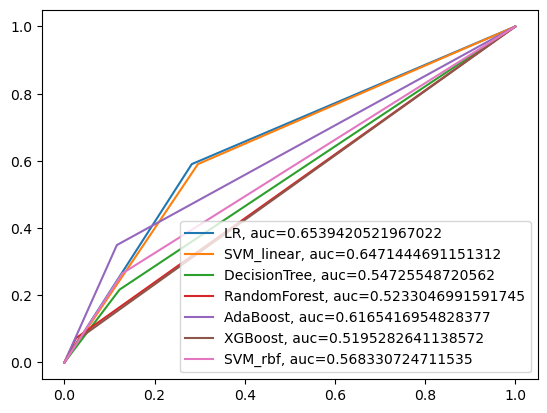

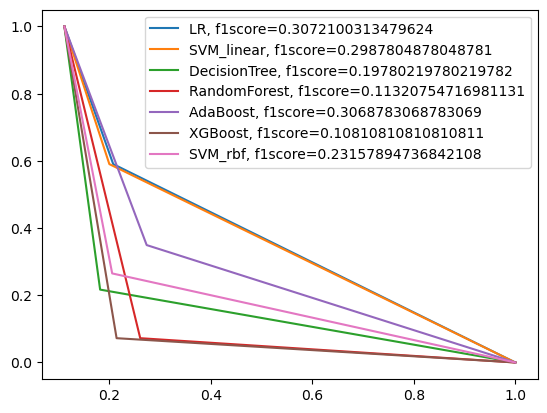

In [58]:
for dataset in allXy:
    ViewResult(dataset, models)

In [59]:
#Function for GridSearchCV for Best Parameters

def GridSearchBP(mod, par, dat):
    rec = {}
    Xy_test = pd.concat([dat[2], dat[3]],axis=1)

    stratifiedCV = StratifiedKFold(n_splits=5)

    for model in mod:
        st = time.time()
        BestParams = GridSearchCV(
            mod[model],
            param_grid = par[model],
            scoring='f1',
            cv=stratifiedCV,
            n_jobs=-1
        )
        BestParams.fit(dat[0], dat[1])
        Xy_test[model] = BestParams.predict(dat[2])
        rec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (rec, Xy_test)

In [60]:
#Different start/stop/step were set to figure out where the "best" parameters are encompassed.
#The below start/stop/step were decided after a few rounds of testing.
models = {
    'LR':LR(),
    'SVM_linear':SVC(kernel='linear'),
    'DecisionTree':DTC(criterion='entropy'),
    'RandomForest':RFC(criterion='entropy'),
    'AdaBoost':ABC(),
    'XGBoost':XGBC(tree_method='gpu_hist'),
    'SVM_rbf':SVC(kernel='rbf')
}
params = {
    'LR':{
        'C':np.arange(0.1,1,0.1)
    },
    'SVM_linear':{
        'C':np.arange(2,40)
    },
    'DecisionTree':{
        'max_depth':np.arange(1,20)
    },
    'RandomForest':{
        'n_estimators':np.arange(10,101,10),
        'max_depth':np.arange(1,20)
    },
    'AdaBoost':{
        'n_estimators':np.arange(10,101,10),
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'XGBoost':{
        'n_estimators':np.arange(10,101,10),
        'max_depth':np.arange(2,6),
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'SVM_rbf':{
        'C':np.arange(2,50)
    }
}

In [61]:
#Getting initial hyperparameters using all features of dataset 1.
#Dataset 1 is chosen due to the smaller sample size, and limited available time and processing power.

dat = df_list[0]

rec1, dfresult1 = GridSearchBP(models, params, dat)

For LR cross validation F1 score is 0.7053
Parameters are {'C': 0.1}.
Runtime = 4.382802724838257
For SVM_linear cross validation F1 score is 0.7154
Parameters are {'C': 10}.
Runtime = 124.25267481803894
For DecisionTree cross validation F1 score is 0.8717
Parameters are {'max_depth': 19}.
Runtime = 0.8237910270690918
For RandomForest cross validation F1 score is 0.9526
Parameters are {'max_depth': 18, 'n_estimators': 100}.
Runtime = 57.599956035614014
For AdaBoost cross validation F1 score is 0.8604
Parameters are {'learning_rate': 0.9, 'n_estimators': 90}.
Runtime = 24.73307728767395
For XGBoost cross validation F1 score is 0.9133
Parameters are {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}.
Runtime = 254.16663098335266
For SVM_rbf cross validation F1 score is 0.9600
Parameters are {'C': 13}.
Runtime = 8.72206449508667


 Contingency Table for LR:
Pred   False  True 
Label              
False    476    186
True      35     48
F1 Score: 0.30283911671924285

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    464    198
True      34     49
F1 Score: 0.296969696969697

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    580     82
True      67     16
F1 Score: 0.17679558011049723

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    642     20
True      76      7
F1 Score: 0.1272727272727273

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    599     63
True      62     21
F1 Score: 0.25149700598802394

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  641  21
True    80   3
F1 Score: 0.05607476635514018

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    616     46
True      75      8
F1 Score: 0.11678832116788321



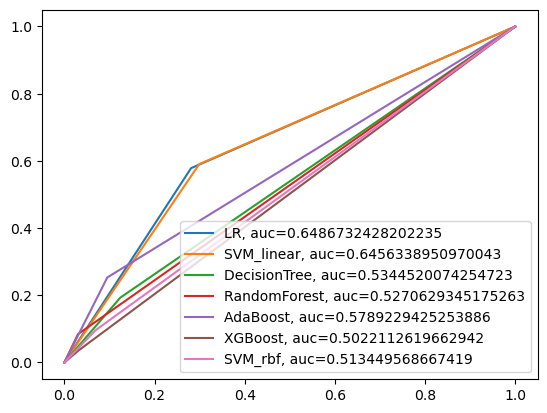

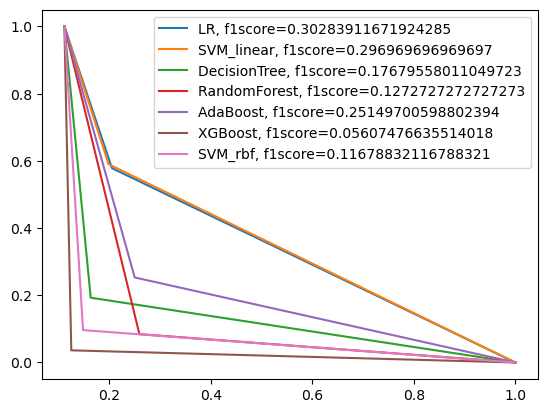

In [62]:
ViewResult(dfresult1, models)

In [63]:
models_2 = {
    'LR':LR(C=0.1),
    'SVM_linear':SVC(kernel='linear',C=10),
    'DecisionTree':DTC(criterion='entropy',max_depth=19),
    'RandomForest':RFC(criterion='entropy',max_depth=18,n_estimators=100),
    'AdaBoost':ABC(learning_rate=0.9,n_estimators=90),
    'XGBoost':XGBC(tree_method='gpu_hist',learning_rate=0.2,max_depth=5,n_estimators=100),
    'SVM_rbf':SVC(kernel='rbf',C=13)
    }

In [41]:
#Testing of feature selection with auto setting and best parameters from above.

data=df_list[0]
fsrec1={}


for model in models_2:
    feature_selection = SFS(
        models_2[model], n_features_to_select='auto', direction="forward", n_jobs=-1
    ).fit(data[0], data[1])
    
    fsrec1[model] = feature_selection
    print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

LR 24 Index(['mbp_mean', 'sbp_max', 'dbp_max', 'dbp_mean', 'temperature_min',
       'temperature_max', 'temperature_mean', 'lactate_min', 'ph_min',
       'ph_max', 'calcium_min', 'calcium_max', 'glucose_max', 'creatinine_min',
       'hemoglobin_max', 'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min',
       'ast_max', 'sofa_respiration', 'sofa_cns',
       'charlson_comorbidity_index'],
      dtype='object')
SVM_linear 24 Index(['gender', 'mbp_min', 'dbp_min', 'temperature_mean', 'lactate_min',
       'lactate_max', 'calcium_min', 'calcium_max', 'glucose_min',
       'glucose_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min',
       'pt_min', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_min', 'sofa_respiration', 'sofa_cns',
       'sofa_renal'],
      dtype='object')
DecisionTree 24 Index(['gender', 'heart_rate_min', 'mbp_max', 'sbp_max', 'sbp_mean',
       'temperature_max', 'temperature_mean', 'ph_min', 'ph_max',
       'cal

In [64]:
#Creating a function for feature selection and fitting of best hyperparameters

def FeatureSelect_BestParams(models, models2, params, data, n_features):
    fsrec = {}
    bprec = {}
    dfresult = pd.concat([data[2],data[3]],axis=1)
    stratifiedCV = StratifiedKFold(n_splits=5)
    
    for model in models2:
        st = time.time()
        feature_selection = SFS(
            models2[model], n_features_to_select=n_features, direction="forward", n_jobs=-1
        ).fit(data[0], data[1])

        fsrec[model] = feature_selection
        print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

        X = data[0].loc[:,list(data[0].columns[feature_selection.support_])]
        X_test = data[2].loc[:,list(data[0].columns[feature_selection.support_])]

        BestParams = GridSearchCV(
            models[model],
            param_grid = params[model],
            scoring='f1',
            n_jobs=-1
        )
        BestParams.fit(X,data[1])
        dfresult[model] = BestParams.predict(X_test)
        bprec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Best parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (fsrec, bprec, dfresult)

In [65]:
#Training and evaluating models with 10 features
data=df_list[0]

fs_rec1_10, bp_rec1_10, dfresult1_10 = FeatureSelect_BestParams(models, models_2, params, data, 10)

LR 10 Index(['sbp_max', 'sbp_mean', 'dbp_max', 'dbp_mean', 'temperature_min',
       'lactate_min', 'wbc_min', 'sofa_respiration', 'sofa_cns', 'sofa_renal'],
      dtype='object')
For LR cross validation F1 score is 0.7040
Best parameters are {'C': 0.8}.
Runtime = 7.852277755737305
SVM_linear 10 Index(['gender', 'mbp_max', 'mbp_mean', 'sbp_max', 'sbp_mean',
       'temperature_mean', 'hemoglobin_max', 'sofa_respiration', 'sofa_cns',
       'sofa_renal'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.6876
Best parameters are {'C': 8}.
Runtime = 195.08024382591248
DecisionTree 10 Index(['gender', 'dbp_min', 'hemoglobin_min', 'sofa_respiration',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_renal',
       'charlson_comorbidity_index', 'sofa_total'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.8653
Best parameters are {'max_depth': 19}.
Runtime = 6.2268993854522705
RandomForest 10 Index(['heart_rate_max', 'sbp_min', 'd

 Contingency Table for LR:
Pred   False  True 
Label              
False    475    187
True      36     47
F1 Score: 0.29652996845425866

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    484    178
True      39     44
F1 Score: 0.28852459016393445

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    565     97
True      68     15
F1 Score: 0.15384615384615385

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    633     29
True      78      5
F1 Score: 0.08547008547008546

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    615     47
True      67     16
F1 Score: 0.21917808219178084

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  649  13
True    80   3
F1 Score: 0.0606060606060606

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    574     88
True      69     14
F1 Score: 0.15135135135135136



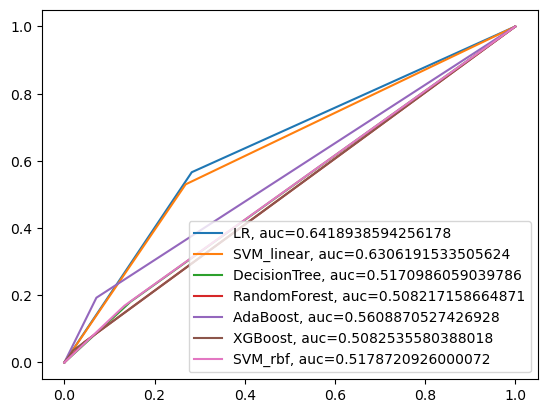

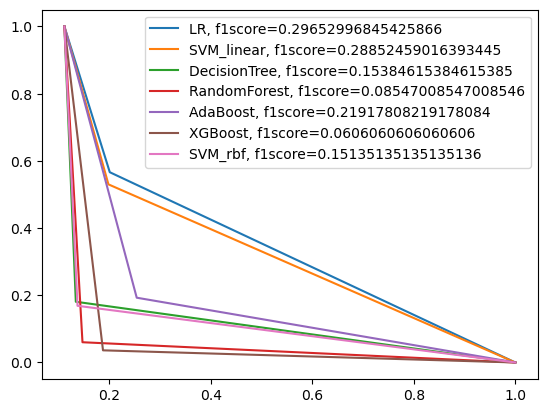

In [67]:
ViewResult(dfresult1_10, models)

In [68]:
params_2 = {
    'LR':{
        'C':np.arange(0.1,1,0.1)
    },
    'SVM_linear':{
        'C':np.arange(2,40)
    },
    'DecisionTree':{
        'max_depth':np.arange(1,20)
    },
    
    #Reducing n_estimators to try and reduce overfitting
    'RandomForest':{
        'n_estimators':np.arange(10,51,10),
        'max_depth':np.arange(1,10)
    },
    'AdaBoost':{
        'n_estimators':np.arange(10,51,10),
        'learning_rate':np.arange(0.1,1,0.1)
    },
    
    'XGBoost':{
        'n_estimators':np.arange(10,51,10),
        'max_depth':np.arange(2,5),
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'SVM_rbf':{
        'C':np.arange(2,20)
    }
}

In [69]:
#Cross-validation f1 score of models is significantly higher than f1 score on test data. 
#There could be possible overfitting.
#Training and testing for 5 features instead to try reduce overfitting.

data=df_list[0]

fs_rec1_5, bp_rec1_5, dfresult1_5 = FeatureSelect_BestParams(models, models_2, params_2, data, 5)

LR 5 Index(['sbp_max', 'sbp_mean', 'dbp_mean', 'temperature_min', 'sofa_cns'], dtype='object')
For LR cross validation F1 score is 0.6855
Best parameters are {'C': 0.6}.
Runtime = 7.241995096206665
SVM_linear 5 Index(['gender', 'mbp_max', 'mbp_mean', 'sbp_max', 'sofa_cns'], dtype='object')
For SVM_linear cross validation F1 score is 0.6798
Best parameters are {'C': 2}.
Runtime = 96.89806365966797
DecisionTree 5 Index(['sofa_respiration', 'sofa_coagulation', 'sofa_renal',
       'charlson_comorbidity_index', 'sofa_total'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.8712
Best parameters are {'max_depth': 19}.
Runtime = 2.345083236694336
RandomForest 5 Index(['dbp_mean', 'lactate_min', 'ph_max', 'sofa_respiration',
       'charlson_comorbidity_index'],
      dtype='object')
For RandomForest cross validation F1 score is 0.7994
Best parameters are {'max_depth': 9, 'n_estimators': 40}.
Runtime = 92.79264998435974
AdaBoost 5 Index(['heart_rate_min', 'heart_rate_mean

 Contingency Table for LR:
Pred   False  True 
Label              
False    478    184
True      44     39
F1 Score: 0.2549019607843137

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    502    160
True      42     41
F1 Score: 0.28873239436619713

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    620     42
True      74      9
F1 Score: 0.13432835820895525

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    432    230
True      49     34
F1 Score: 0.19596541786743515

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    606     56
True      72     11
F1 Score: 0.14666666666666667

 Contingency Table for XGBoost:
Pred     0  1
Label        
False  654  8
True    83  0
F1 Score: 0.0

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    541    121
True      49     34
F1 Score: 0.2857142857142857



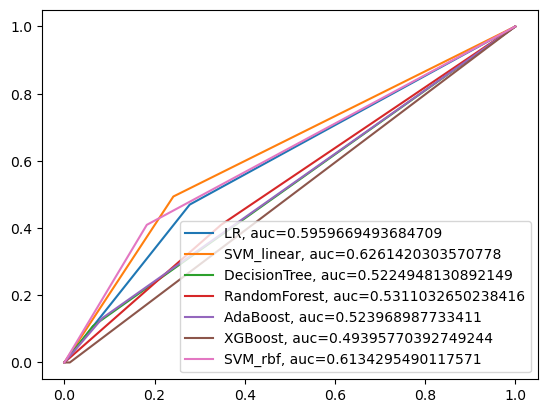

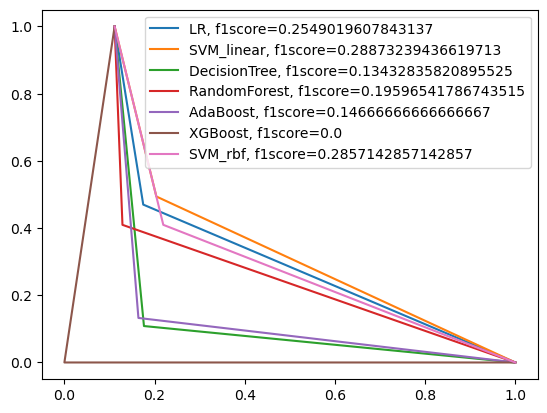

In [70]:
ViewResult(dfresult1_5, models)

In [71]:
data=df_list[0]

fs_rec1_15, bp_rec1_15, dfresult1_15 = FeatureSelect_BestParams(models, models_2, params_2, data, 15)

LR 15 Index(['mbp_min', 'mbp_max', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max',
       'dbp_mean', 'temperature_min', 'temperature_max', 'lactate_min',
       'glucose_max', 'wbc_min', 'sofa_respiration', 'sofa_cns', 'sofa_renal'],
      dtype='object')
For LR cross validation F1 score is 0.7038
Best parameters are {'C': 0.1}.
Runtime = 11.25362229347229
SVM_linear 15 Index(['gender', 'mbp_max', 'mbp_mean', 'sbp_max', 'sbp_mean', 'dbp_min',
       'temperature_min', 'temperature_mean', 'lactate_min', 'wbc_min',
       'hemoglobin_min', 'hemoglobin_max', 'sofa_respiration', 'sofa_cns',
       'sofa_renal'],
      dtype='object')
For SVM_linear cross validation F1 score is 0.7059
Best parameters are {'C': 2}.
Runtime = 340.9213285446167
DecisionTree 15 Index(['gender', 'heart_rate_max', 'sbp_min', 'sbp_mean', 'temperature_max',
       'glucose_min', 'glucose_max', 'sofa_respiration', 'sofa_coagulation',
       'sofa_liver', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charlso

 Contingency Table for LR:
Pred   False  True 
Label              
False    250     79
True      27     20
F1 Score: 0.273972602739726

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False    235     94
True      20     27
F1 Score: 0.3214285714285714

 Contingency Table for DecisionTree:
Pred   False  True 
Label              
False    289     40
True      39      8
F1 Score: 0.16842105263157894

 Contingency Table for RandomForest:
Pred   False  True 
Label              
False    303     26
True      36     11
F1 Score: 0.2619047619047619

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False    283     46
True      36     11
F1 Score: 0.21153846153846154

 Contingency Table for XGBoost:
Pred     0   1
Label         
False  294  35
True    38   9
F1 Score: 0.19780219780219782

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False    277     52
True      39      8
F1 Score: 0.14953271028037382



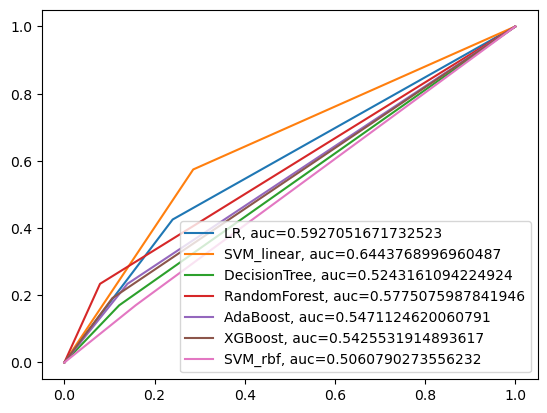

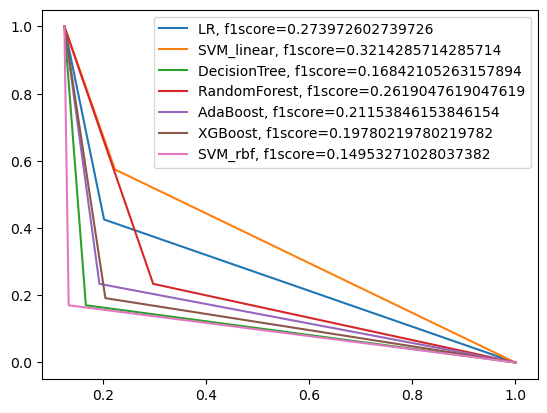

In [33]:
ViewResult(dfresult1_15, models)

In [ ]:
# Although the cross-validation f1 score is high, the f1 score of predicted outcomes is low.
# This shows that the models are overfitting. The result is the similar when we change the number of features.
# A possible reason could be the low number of data points resulting to 
# the model being learning from noise instead of actual patterns
# As such, testing on a bigger dataset, dataset 3, is explored below.

In [ ]:
models_data3 = {
    'LR':LR(),
    'DecisionTree':DTC(criterion='entropy'),
    'XGBoost':XGBC(),
    'SVM_rbf':SVC(kernel='rbf')
    }

params_data3 = {
    'LR':{
        'C':np.arange(0.1,2,0.1)
    },
    'DecisionTree':{
        'max_depth':np.arange(1,20)
    },

    'XGBoost':{
        'n_estimators':np.arange(2,50), 
        'max_depth':np.arange(2,5),
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'SVM_rbf':{
        'C':np.arange(1,102,10)
    }
}

In [34]:
data3 = df_list[2]

#Based on the testing on dataset 1, SVM linear models seems to have similar performance to the Logistic Regression models.
#However, the time spent on feature selection and hyper parameter 
#tuning of a SVM_linear model is significantly higher than those of a Logistic Regression model.
#As such, SVM linear model is removed for now until a good feature set for linear models is gathered.
#Random Forest and Adaboost are removed due to time constriants.

rec3, dfresult3 = GridSearchBP(models_data3, params_data3, data3)

For LR cross validation F1 score is 0.6938
Parameters are {'C': 0.4}.
Runtime = 6.446805953979492
For DecisionTree cross validation F1 score is 0.9415
Parameters are {'max_depth': 19}.
Runtime = 7.404410123825073
For XGBoost cross validation F1 score is 0.9713
Parameters are {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 49}.
Runtime = 976.6471989154816
For SVM_rbf cross validation F1 score is 0.9805
Parameters are {'C': 51}.
Runtime = 1001.8630979061127


In [ ]:
ViewResults(dfresult3, models_data3)

In [35]:
params_data3 = {
    'LR':{
        'C':np.arange(0.1,1,0.1)
    },
    'DecisionTree':{
        'max_depth':np.arange(1,20)
    },
    'XGBoost':{
        'n_estimators':np.arange(10,51,10), 
        'max_depth':np.arange(2,5),
        'learning_rate':np.arange(0.1,1,0.1)
    },
    'SVM_rbf':{
        'C':np.arange(2,20)
    }
}

models2_data3 = {
    'LR':LR(C=0.4),
    'DecisionTree':DTC(criterion='entropy',max_depth=19),
    'XGBoost':XGBC(learning_rate=0.5, max_depth=4, n_estimators=49),
    'SVM_rbf':SVC(kernel='rbf',C=51)
}

In [ ]:
data3 = df_list[2]

fsrec3_10, bprec3_10, dfresult3_10 = FeatureSelect_BestParams(models_data3, models2_data3, params_data3, data3, 10)

LR 10 Index(['heart_rate_max', 'mbp_min', 'mbp_mean', 'dbp_min', 'creatinine_min',
       'hemoglobin_min', 'pt_max', 'urineoutput', 'sofa_cardiovascular',
       'sofa_cns'],
      dtype='object')
For LR cross validation F1 score is 0.6942
Best parameters are {'C': 0.1}.
Runtime = 34.2968590259552
DecisionTree 10 Index(['gender', 'dbp_max', 'temperature_min', 'creatinine_min',
       'creatinine_max', 'hemoglobin_min', 'sofa_coagulation',
       'sofa_cardiovascular', 'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')
For DecisionTree cross validation F1 score is 0.9506
Best parameters are {'max_depth': 18}.
Runtime = 59.18943786621094
XGBoost 10 Index(['gender', 'dbp_min', 'creatinine_min', 'creatinine_max',
       'hemoglobin_min', 'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')
For XGBoost cross validation F1 score is 0.9741
Best parameters are {'learning_rate': 0.6, 'max_depth': 4, 'n_

In [ ]:
fig = px.scatter(
    dfresult3_10.melt(id_vars=['x1','x2'],value_vars=['label','DecisionTree','XGBoost','SVM_rbf']),
    x='x1',
    y='x2',
    facet_col='variable',
    color='value'
)
fig.update_traces(
    marker={'size':5}
)
fig.update_yaxes(
    scaleanchor='x',
    scaleratio=1
)

In [49]:
data = df_list[1]

rec2, dfresult2 = GridSearchBP(models_data3, models2_data3, params_data3, data3, 10)

For LR cross validation F1 score is 0.6944
Parameters are {'C': 1.0}.
For DecisionTree cross validation F1 score is 0.9221
Parameters are {'max_depth': 32}.
For RandomForest cross validation F1 score is 0.9808
Parameters are {'max_depth': 80, 'n_estimators': 200}.
For XGBoost cross validation F1 score is 0.9590
Parameters are {'learning_rate': 0.30000000000000004, 'max_depth': 9, 'n_estimators': 35}.
For SVM_rbf cross validation F1 score is 0.9718
Parameters are {'C': 51}.
